**Import Packages**

In [214]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import display
import warnings

pd.set_option('display.max_columns', None, 'display.max_rows', None)
warnings.filterwarnings('ignore')

**Step 1** Import the necessary packages.

In [215]:
df = pd.read_csv(r'/Users/humphrjk/Library/CloudStorage/OneDrive-UNTSystem/ADTA 5320/ADTA 5230/ADTA 5230/experimental/GermanCredit.csv')

**Step 2** Load the data.

In [216]:
display(df.head())

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO-APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,1169,4,4,4,0,1,0,0,0,4,1,0,67,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,5951,0,2,2,0,0,0,0,0,2,1,0,22,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,2096,0,3,2,0,1,0,0,0,3,1,0,49,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,7882,0,3,2,0,1,0,0,1,4,0,0,45,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,4870,0,2,3,0,1,0,0,0,4,0,1,53,0,0,0,2,2,2,0,0,0


**Step 3** Check the data.

In [217]:
#check for missing values
df_missing_values = df.isnull().sum()
display(df_missing_values)

OBS#                0
CHK_ACCT            0
DURATION            0
HISTORY             0
NEW_CAR             0
USED_CAR            0
FURNITURE           0
RADIO/TV            0
EDUCATION           0
RETRAINING          0
AMOUNT              0
SAV_ACCT            0
EMPLOYMENT          0
INSTALL_RATE        0
MALE_DIV            0
MALE_SINGLE         0
MALE_MAR_or_WID     0
CO-APPLICANT        0
GUARANTOR           0
PRESENT_RESIDENT    0
REAL_ESTATE         0
PROP_UNKN_NONE      0
AGE                 0
OTHER_INSTALL       0
RENT                0
OWN_RES             0
NUM_CREDITS         0
JOB                 0
NUM_DEPENDENTS      0
TELEPHONE           0
FOREIGN             0
RESPONSE            0
dtype: int64

**Step 4** Data Preprocessing.  


In [218]:
categorical_cols = ['CHK_ACCT', 'SAV_ACCT', 'EMPLOYMENT', 'HISTORY', 'JOB']
df_new = pd.get_dummies(df, columns=categorical_cols, drop_first=True,dtype=int)
df_new.drop(['OBS#'], axis=1, inplace=True)
display(df_new.head())

,DURATION,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO-APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE,CHK_ACCT_1,CHK_ACCT_2,CHK_ACCT_3,SAV_ACCT_1,SAV_ACCT_2,SAV_ACCT_3,SAV_ACCT_4,EMPLOYMENT_1,EMPLOYMENT_2,EMPLOYMENT_3,EMPLOYMENT_4,HISTORY_1,HISTORY_2,HISTORY_3,HISTORY_4,JOB_1,JOB_2,JOB_3
0,6,0,0,0,1,0,0,1169,4,0,1,0,0,0,4,1,0,67,0,0,1,2,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
1,48,0,0,0,1,0,0,5951,2,0,0,0,0,0,2,1,0,22,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,12,0,0,0,0,1,0,2096,2,0,1,0,0,0,3,1,0,49,0,0,1,1,2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
3,42,0,0,1,0,0,0,7882,2,0,1,0,0,1,4,0,0,45,0,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,24,1,0,0,0,0,0,4870,3,0,1,0,0,0,4,0,1,53,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


**Step 5** Stats Model for Logistic Regression.

In [219]:
model = sm.Logit(df_new['RESPONSE'], df_new.drop('RESPONSE', axis=1))
result = model.fit()
metrics = pd.DataFrame(index=['AIC', 'BIC'], columns=['Value'], data=[[result.aic], [result.bic]]).round(0)
display(metrics)
display(result.summary())

Optimization terminated successfully.
         Current function value: 0.451060
         Iterations 7


,Value
AIC,988.0
BIC,1199.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               RESPONSE   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      957
Method:                           MLE   Df Model:                           42
Date:                Sun, 29 Dec 2024   Pseudo R-squ.:                  0.2616
Time:                        15:30:30   Log-Likelihood:                -451.06
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 2.193e-44
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
DURATION            -0.0264      0.009     -2.891      0.004      -0.044      -0.008
NEW_CAR             -0.6563      0.371     -1.769      0.077      -1.384       0.071
USED_CAR             0.9746      0.473      2.062      0.039       0.048       1.901
FURNITURE            0.1437      0.385      0.373      0.709      -0.611       0.898
RADIO/TV             0.2250      0.379      0.594      0.552      -0.517       0.967
EDUCATION           -0.7075      0.496     -1.425      0.154      -1.680       0.265
RETRAINING           0.0859      0.432      0.199      0.842      -0.760       0.932
AMOUNT              -0.0001   4.35e-05     -2.629      0.009      -0.000   -2.91e-05
INSTALL_RATE        -0.2959      0.085     -3.481      0.000      -0.463      -0.129
MALE_DIV            -0.2778      0.386     -0.720      0.472      -1.034       0.479
MALE_SINGLE          0.5291      0.208      2.539      0.011       0.121       0.937
MALE_MAR_or_WID      0.1687      0.308      0.548      0.584      -0.435       0.772
CO-APPLICANT        -0.3926      0.404     -0.972      0.331      -1.184       0.399
GUARANTOR            0.9288      0.418      2.220      0.026       0.109       1.749
PRESENT_RESIDENT     0.0229      0.085      0.271      0.787      -0.143       0.188
REAL_ESTATE          0.2511      0.213      1.177      0.239      -0.167       0.669
PROP_UNKN_NONE      -0.3271      0.360     -0.908      0.364      -1.033       0.379
AGE                  0.0177      0.009      2.024      0.043       0.001       0.035
OTHER_INSTALL       -0.5775      0.212     -2.725      0.006      -0.993      -0.162
RENT                -0.3785      0.419     -0.903      0.366      -1.200       0.443
OWN_RES              0.0612      0.390      0.157      0.875      -0.704       0.826
NUM_CREDITS         -0.1910      0.180     -1.061      0.289      -0.544       0.162
NUM_DEPENDENTS      -0.1656      0.241     -0.686      0.492      -0.639       0.307
TELEPHONE            0.2980      0.199      1.497      0.134      -0.092       0.688
FOREIGN              1.4271      0.635      2.247      0.025       0.182       2.672
CHK_ACCT_1           0.4310      0.212      2.034      0.042       0.016       0.846
CHK_ACCT_2           1.0500      0.366      2.867      0.004       0.332       1.768
CHK_ACCT_3           1.7150      0.229      7.491      0.000       1.266       2.164
SAV_ACCT_1           0.3353      0.284      1.181      0.238      -0.221       0.892
SAV_ACCT_2           0.4347      0.400      1.087      0.277      -0.349       1.219
SAV_ACCT_3           1.2373      0.516      2.398      0.016       0.226       2.249
SAV_ACCT_4           0.9474      0.261      3.634      0.000       0.436       1.458
EMPLOYMENT_1         0.0986      0.425      0.232      0.817      -0.734       0.932
EMPLOYMENT_2         0.2242      0.410      0.547      0.584      -0.579       1.027
EMPLOYMENT_3         0.8270      0.443      1.868      0.062      -0.041       1.695
EMPLOYMENT_

**Step 6** Confusion Matrix.

In [220]:
confusion_matrix = result.pred_table()
display(confusion_matrix)

array([[161., 139.],
       [ 78., 622.]])

**Step 7** Model Metrics.

In [221]:
accuracy = (confusion_matrix[0,0]+confusion_matrix[1,1])/confusion_matrix.sum()
precision = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
recall = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0])
f1_score = 2*precision*recall/(precision+recall)
misclassification_rate = 1-accuracy

results = pd.DataFrame([accuracy, precision, recall, f1_score, misclassification_rate], index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Misclassification Rate'], columns=['Value'])
display(results)

,Value
Accuracy,0.783000
Precision,0.817346
Recall,0.888571
F1 Score,0.851472
Misclassification Rate,0.217000


**Step 8** Confusion Matrix. Chart

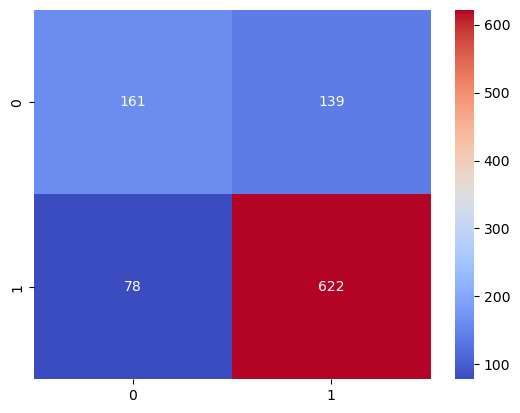

In [222]:
chart = sns.heatmap(confusion_matrix, annot=True, fmt='.0f', cmap='coolwarm')

**Step 9 VIF Removal**
**Create new dataframe to make sure results aren't inherited from previous models.**

In [223]:
df_vif = df_new
target = df['RESPONSE']
X = df_vif.drop('RESPONSE', axis=1)
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

**Step 10** Calcualte VIF and remove variables with VIF > 10: List removed and selected variables.

In [224]:

def strict_vif_selection(X, max_vif=10, min_features=2):
    initial_features = list(X.columns)
    current_features = initial_features.copy()
    removed_features = []
    removal_history = []
    
    while len(current_features) > min_features:
        # Calculate current VIFs
        vif_data = pd.DataFrame()
        vif_data["Variable"] = current_features
        vif_data["VIF"] = [variance_inflation_factor(X[current_features].values, i) 
                          for i in range(len(current_features))]
        
        vif_data = vif_data.sort_values('VIF', ascending=False)
        max_current_vif = vif_data.iloc[0]['VIF']
        
        # Stop if all VIFs are below threshold
        if max_current_vif < max_vif:
            break
            
        # Remove highest VIF feature
        feature_to_remove = vif_data.iloc[0]['Variable']
        current_features.remove(feature_to_remove)
        removed_features.append((feature_to_remove, max_current_vif))
        removal_history.append(f"Removed {feature_to_remove} (VIF: {max_current_vif:.2f})")
    
    # Final VIF calculation
    final_vif = pd.DataFrame({
        'Selected Features': current_features,
        'Final VIF': [variance_inflation_factor(X[current_features].values, i) 
                     for i in range(len(current_features))]
    })
    
  
    #print("\nRemoved Features:")
    #for feature, vif in removed_features:
    #    print(f"- {feature}: VIF = {vif:.2f}")
    removed_features_df = pd.DataFrame(removed_features, columns=['Removed Feature', 'VIF'])
    display(removed_features_df)
    
    print("\nFinal Features:")
    display(final_vif.sort_values('Final VIF', ascending=False))
    return current_features

# Usage
selected_features = strict_vif_selection(X_train, max_vif=10)
    

,Removed Feature,VIF
0,JOB_2,41.914388
1,OWN_RES,16.959188
2,AGE,14.769811
3,NUM_DEPENDENTS,12.019392
4,HISTORY_2,11.385250



Final Features:


,Selected Features,Final VIF
8,INSTALL_RATE,9.832205
19,NUM_CREDITS,9.801000
14,PRESENT_RESIDENT,8.493004
0,DURATION,7.844037
30,EMPLOYMENT_2,7.564636
32,EMPLOYMENT_4,6.291609
7,AMOUNT,5.476303
4,RADIO/TV,5.215397
29,EMPLOYMENT_1,4.642830
31,EMPLOYMENT_3,4.482714


**Step 11** Stats Model for Logistic Regression.

In [225]:
#fit the model
best_model = sm.Logit(y_train, sm.add_constant(X_train[selected_features])).fit()
#display the summary
metrics_vif = pd.DataFrame(index=['AIC', 'BIC'], columns=['Value'], data=[[best_model.aic], [best_model.bic]]).round(0)
display(metrics_vif)
display(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.448678
         Iterations 7


,Value
AIC,706.0
BIC,884.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               RESPONSE   No. Observations:                  700
Model:                          Logit   Df Residuals:                      661
Method:                           MLE   Df Model:                           38
Date:                Sun, 29 Dec 2024   Pseudo R-squ.:                  0.2595
Time:                        15:30:34   Log-Likelihood:                -314.07
converged:                       True   LL-Null:                       -424.16
Covariance Type:            nonrobust   LLR p-value:                 1.628e-27
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.7145      0.842      2.037      0.042       0.065       3.364
DURATION            -0.0257      0.011     -2.294      0.022      -0.048      -0.004
NEW_CAR             -0.7052      0.468     -1.507      0.132      -1.622       0.212
USED_CAR             1.1666      0.588      1.984      0.047       0.014       2.319
FURNITURE            0.2610      0.487      0.536      0.592      -0.693       1.215
RADIO/TV             0.3532      0.468      0.754      0.451      -0.565       1.271
EDUCATION           -0.7383      0.585     -1.263      0.207      -1.884       0.408
RETRAINING           0.5191      0.547      0.949      0.343      -0.553       1.591
AMOUNT              -0.0002   5.42e-05     -3.271      0.001      -0.000   -7.11e-05
INSTALL_RATE        -0.1914      0.107     -1.796      0.073      -0.400       0.018
MALE_DIV            -0.1703      0.469     -0.363      0.717      -1.090       0.750
MALE_SINGLE          0.3458      0.244      1.420      0.156      -0.132       0.823
MALE_MAR_or_WID      0.1197      0.366      0.327      0.744      -0.597       0.837
CO-APPLICANT        -0.3473      0.504     -0.689      0.491      -1.336       0.641
GUARANTOR            0.7640      0.477      1.601      0.109      -0.171       1.699
PRESENT_RESIDENT    -0.0260      0.101     -0.259      0.796      -0.223       0.171
REAL_ESTATE         -0.1072      0.258     -0.415      0.678      -0.613       0.399
PROP_UNKN_NONE      -0.4605      0.311     -1.479      0.139      -1.070       0.150
OTHER_INSTALL       -0.7553      0.253     -2.981      0.003      -1.252      -0.259
RENT                -0.6474      0.269     -2.407      0.016      -1.174      -0.120
NUM_CREDITS         -0.5220      0.218     -2.391      0.017      -0.950      -0.094
TELEPHONE            0.2020      0.236      0.856      0.392      -0.261       0.665
FOREIGN              1.1979      0.676      1.772      0.076      -0.127       2.523
CHK_ACCT_1           0.2655      0.265      1.001      0.317      -0.254       0.785
CHK_ACCT_2           0.7205      0.419      1.720      0.085      -0.101       1.541
CHK_ACCT_3           1.5967      0.276      5.794      0.000       1.057       2.137
SAV_ACCT_1           0.4693      0.351      1.336      0.181      -0.219       1.158
SAV_ACCT_2           0.9653      0.572      1.688      0.091      -0.155       2.086
SAV_ACCT_3           1.0277      0.567      1.813      0.070      -0.083       2.139
SAV_ACCT_4           0.7940      0.312      2.545      0.011       0.183       1.405
EMPLOYMENT_1         0.3103      0.505      0.614      0.539      -0.680       1.300
EMPLOYMENT_2         0.5104      0.485      1.053      0.292      -0.440       1.461
EMPLOYMENT_3         1.0845      0.531      2.044      0.041       0.044       2.125
EMPLOYMENT_4         0.3998      0.493      0.811      0.417      -0.566       1.366
HISTORY_1           -0.5803      0.436     -1.330      0.183      -1.435       0.275
HISTORY_3  

**Step 12** Confusion Matrix and model metrics.

Predicted   0    1
Actual            
0          42   52
1          22  184


,Value
Accuracy,0.753333
Precision,0.893204
Recall,0.779661
F1 Score,0.832579
Misclassification Rate,0.246667


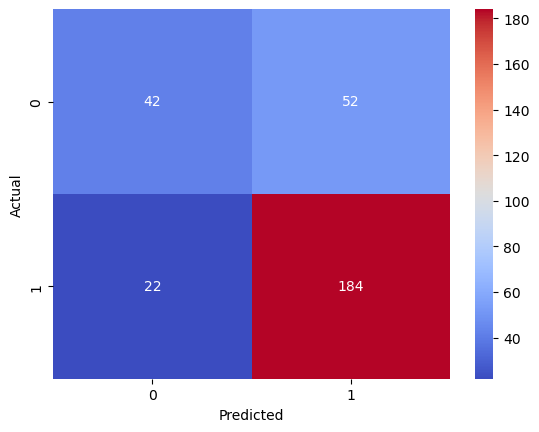

In [226]:
y_pred_vif = best_model.predict(sm.add_constant(X_test[selected_features]))
y_pred_binary = (y_pred_vif > 0.5).astype(int)

confusion_matrix_vif = pd.crosstab(y_test, y_pred_binary, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_vif)

accuracy_vif = (confusion_matrix_vif[0][0] + confusion_matrix_vif[1][1]) / confusion_matrix_vif.values.sum()
precision_vif = confusion_matrix_vif[1][1] / (confusion_matrix_vif[1][1] + confusion_matrix_vif[0][1])
recall_vif = confusion_matrix_vif[1][1] / (confusion_matrix_vif[1][1] + confusion_matrix_vif[1][0])
f1_score_vif = 2 * precision_vif * recall_vif / (precision_vif + recall_vif)
misclassification_rate_vif = 1 - accuracy_vif
vif_results = pd.DataFrame([accuracy_vif, precision_vif, recall_vif, f1_score_vif, misclassification_rate_vif], index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Misclassification Rate'], columns=['Value'])
display(vif_results)
chart = sns.heatmap(confusion_matrix_vif, annot=True, fmt='.0f', cmap='coolwarm')


**Step 13** Create new dataframe to make sure results aren't inherited from previous models.
**Stepwise Selection**

In [227]:
df_step = df_new
target = df['RESPONSE']
X_step = df_step.drop('RESPONSE', axis=1)
y_step = target
X_train_step, X_test_step, y_train_step, y_test_step = train_test_split(X_step, y_step, test_size=0.3, random_state=1234)

Removed OWN_RES (p-value: 0.9792)
Removed JOB_1 (p-value: 0.8094)
Removed JOB_2 (p-value: 0.8235)
Removed MALE_MAR_or_WID (p-value: 0.7201)
Removed PRESENT_RESIDENT (p-value: 0.6958)
Removed REAL_ESTATE (p-value: 0.6363)
Removed HISTORY_2 (p-value: 0.6363)
Removed MALE_DIV (p-value: 0.5999)
Removed FURNITURE (p-value: 0.5595)
Removed RADIO/TV (p-value: 0.5692)
Removed RETRAINING (p-value: 0.5571)
Removed CO-APPLICANT (p-value: 0.4669)
Removed EMPLOYMENT_4 (p-value: 0.4612)
Removed EMPLOYMENT_1 (p-value: 0.7637)
Removed JOB_3 (p-value: 0.5245)
Removed NUM_DEPENDENTS (p-value: 0.4176)
Removed EMPLOYMENT_2 (p-value: 0.3834)
Removed TELEPHONE (p-value: 0.3213)
Removed CHK_ACCT_1 (p-value: 0.2374)
Removed AGE (p-value: 0.2105)
Removed HISTORY_1 (p-value: 0.1462)
Removed MALE_SINGLE (p-value: 0.1195)
Removed INSTALL_RATE (p-value: 0.1267)
Removed SAV_ACCT_1 (p-value: 0.0717)
Removed SAV_ACCT_2 (p-value: 0.0874)
Removed SAV_ACCT_3 (p-value: 0.1020)
Removed GUARANTOR (p-value: 0.1143)
Removed 

,Value
AIC,692.0
BIC,756.0



Final Model Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               RESPONSE   No. Observations:                  700
Model:                          Logit   Df Residuals:                      686
Method:                           MLE   Df Model:                           13
Date:                Sun, 29 Dec 2024   Pseudo R-squ.:                  0.2168
Time:                        15:30:36   Log-Likelihood:                -332.20
converged:                       True   LL-Null:                       -424.16
Covariance Type:            nonrobust   LLR p-value:                 2.685e-32
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.2288      0.349      6.385      0.000       1.545       2.913
DURATION         -0.0315      0.010     -3.164      0.002      -0.051      -0.012
NEW_CAR          -1.1172      0.230     -4.856      0.000      -1.568      -0.666
EDUCATION        -1.2857      0.388     -3.314      0.001      -2.046      -0.525
AMOUNT           -0.0001   4.07e-05     -2.771      0.006      -0.000    -3.3e-05
OTHER_INSTALL    -0.7461      0.228     -3.277      0.001      -1.192      -0.300
RENT             -0.6589      0.242     -2.722      0.006      -1.133      -0.184
NUM_CREDITS      -0.5154      0.210     -2.454      0.014      -0.927      -0.104
FOREIGN           1.3212      0.647      2.042      0.041       0.053       2.589
CHK_ACCT_3        1.5501      0.229      6.764      0.000       1.101       1.999
SAV_ACCT_4        0.6785      0.290      2.343      0.019       0.111       1.246
EMPLOYMENT_3      0.8294      0.284      2.925      0.003       0.274       1.385
HISTORY_3         0.8230      0.366      2.250      0.024       0.106       1.540
HISTORY_4         1.0534      0.284      3.704      0.000       0.496       1.611
=================================================================================
"""

Predicted   0    1
Actual            
0          91  115
1          45  449


,Value
Accuracy,0.771429
Precision,0.796099
Recall,0.908907
F1 Score,0.848771
Misclassification Rate,0.228571


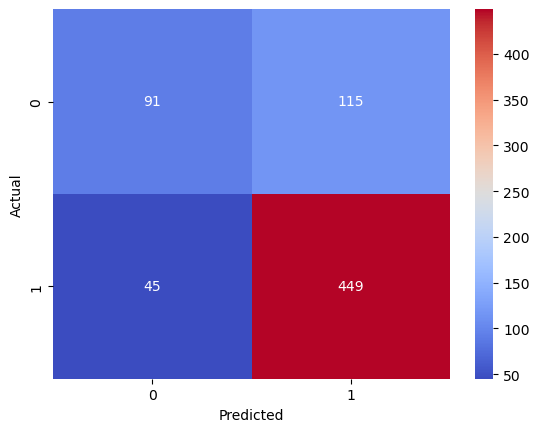

In [228]:
def stepwise_selection(X, y, p_threshold=0.05):
    
    initial_features = list(X.columns)
    current_features = initial_features.copy()
    removed_features = []
    best_bic = float('inf')
    
    while len(current_features) > 1:
        # Fit model with current features
        X_current = sm.add_constant(X[current_features])
        model = sm.Logit(y, X_current).fit(disp=0)
        current_pvalues = model.pvalues[1:]  # Exclude constant
        current_bic = model.bic
        
        # Check if any removed features should be added back
        for removed_feature in removed_features.copy():
            test_features = current_features + [removed_feature]
            X_test = sm.add_constant(X[test_features])
            test_model = sm.Logit(y, X_test).fit(disp=0)
            
            if test_model.bic < current_bic:
                current_features.append(removed_feature)
                removed_features.remove(removed_feature)
                current_bic = test_model.bic
                print(f"Re-added {removed_feature} (BIC improved to {current_bic:.2f})")
        
        # Remove worst feature if p-value > threshold
        max_pvalue = current_pvalues.max()
        if max_pvalue > p_threshold:
            worst_feature = current_pvalues.idxmax()
            current_features.remove(worst_feature)
            removed_features.append(worst_feature)
            print(f"Removed {worst_feature} (p-value: {max_pvalue:.4f})")
        else:
            break
    
    # Final model summary
    final_X = sm.add_constant(X[current_features])
    step_model = sm.Logit(y, final_X).fit(disp=0)
    metrics_step = pd.DataFrame(index=['AIC', 'BIC'], columns=['Value'], data=[[step_model.aic], [step_model.bic]]).round(0)
    display(metrics_step)
    print("\nFinal Model Summary:")
    display(step_model.summary())
    
    # Confusion matrix
    y_pred_binary = (step_model.predict(final_X) > 0.5).astype(int)
    confusion_matrix_step = pd.crosstab(y, y_pred_binary, rownames=['Actual'], colnames=['Predicted'])
    print(confusion_matrix_step)

    # Chart Confusion Matrix
    chart = sns.heatmap(confusion_matrix_step, annot=True, fmt='.0f', cmap='coolwarm')

    # Metrics
    accuracy_step = (confusion_matrix_step.iloc[0,0] + confusion_matrix_step.iloc[1,1]) / confusion_matrix_step.values.sum()
    precision_step = confusion_matrix_step.iloc[1,1] / (confusion_matrix_step.iloc[1,1] + confusion_matrix_step.iloc[0,1])
    recall_step = confusion_matrix_step.iloc[1,1] / (confusion_matrix_step.iloc[1,1] + confusion_matrix_step.iloc[1,0])
    f1_score_step = 2 * precision_step * recall_step / (precision_step + recall_step)
    misclassification_rate_step = 1 - accuracy_step

    #display results
    results_step = pd.DataFrame([accuracy_step, precision_step, recall_step, f1_score_step, misclassification_rate_step], index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Misclassification Rate'], columns=['Value'])
    display(results_step)
    

    return current_features, step_model

# Usage
selected_features, step_model = stepwise_selection(X_train_step, y_train_step)